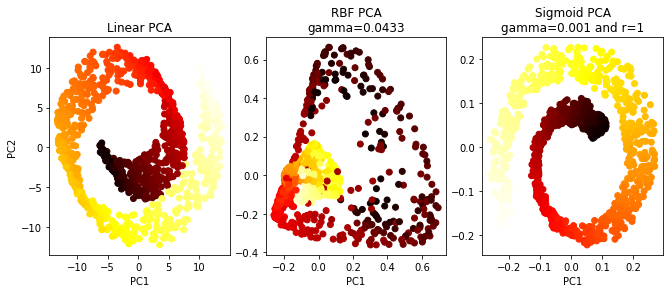

In [29]:
# Kernel PCA
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lin_pca = KernelPCA(n_components=2, kernel ="linear",fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel ="rbf", gamma=0.0433,fit_inverse_transform=True)
sigmoid_pca = KernelPCA(n_components=2, kernel ="sigmoid",gamma=0.001, coef0=1,fit_inverse_transform=True)

kernal_info = ((131,"Linear PCA",lin_pca),
               (132,"RBF PCA\ngamma=0.0433", rbf_pca),
               (133, "Sigmoid PCA\ngamma=0.001 and r=1",sigmoid_pca))

plt.figure(figsize=(11,4))
for plot,title,pca in kernal_info:
  X_reduced = pca.fit_transform(X)
  if plot == 132:
        X_reduced_rbf = X_reduced
  plt.subplot(plot)
  plt.title(title, fontsize=12)
  plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y,cmap=plt.cm.hot)
  plt.xlabel("PC1")
  if plot == 131:
    plt.ylabel("PC2")


In [30]:
# Selecting a Kernel and Tuning Hyperparameters
# Supervised Approach
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
y = y > 6.9
clf = Pipeline([
 ("kpca", KernelPCA(n_components=2)),
 ("log_reg", LogisticRegression())
 ])
param_grid = [{
 "kpca__gamma": np.linspace(0.03, 0.05, 10),
 "kpca__kernel": ["rbf", "sigmoid"]
 }]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)

# UnSupervised Approach
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)      # 32.78- Change the hyper parameter to reduce the error



{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}
